VALIAU Virgile

DESCARPENTRIES Rémy

# Extended Kalman Filter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
donnees = pd.read_excel('donnee.xlsx')
donnees

,Unnamed: 0,Temps,signalReel,signalBruite
0,0,0.000000,0.000000,-0.503936
1,1,0.005174,1.901397,4.727026
2,2,0.010348,3.517097,5.284031
3,3,0.015522,4.604329,3.413861
4,4,0.020695,4.999729,8.070117
...,...,...,...,...
19995,19995,103.450952,2.641259,0.248060
19996,19996,103.456126,0.828373,2.814468
19997,19997,103.461300,-1.108982,-0.931087
19998,19998,103.466474,-2.879705,-3.095697


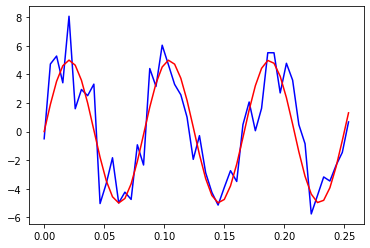

In [3]:
N = 50
plt.plot(donnees['Temps'][:N],donnees['signalBruite'][:N],'b')
plt.plot(donnees['Temps'][:N],donnees['signalReel'][:N],'r')
plt.show()

In [4]:
def f(x):
    return x

def h(k):
    return donnees['signalReel'][k]

def EKF(Z,Q,R,F):
    N=len(Z)
    X = [[np.random.rand(),np.random.rand()]]
    P = [np.zeros((2,2))]
    k=0
    while k<N-1:
        x_kp1_k = f(X[-1])
        P_kp1_k = P[-1] + Q
        k+=1
        H=np.array([np.sin(2*np.pi*vo*k*Te+Phik),ak*np.cos(2*np.pi*vo*k*Te+Phik)])
        S = (H@P_kp1_k@H).T + R
        K = P_kp1_k@(H.T)/S
        e = Z[k] - x_kp1_k[0]*np.sin(2*np.pi*vo*Te*k + x_kp1_k[1])
        X.append(x_kp1_k + K*e)
        P.append(P_kp1_k-np.outer(K,H)@P_kp1_k)
    return X       

In [5]:
ak=5
Phik = 0
vo = 12
ve = 193.28
Te = donnees['Temps'][1]

N = len(donnees)

In [6]:
def plot_coeffs_EKF(diag_Q = [2e-5,2e-1]):
    Q=np.diag(diag_Q)
    print('Q[0,0] = ' + str(Q[0,0]))
    print('Q[1,1] = ' + str(Q[1,1]))

    R=3
    A=np.eye(2)
    x_est = EKF(donnees['signalBruite'],Q,R,A)
    x_est=np.array(x_est)
    plt.plot(donnees['Temps'],x_est[:,0])
    plt.title('Amplitude estimée')
    plt.show()
    plt.plot(donnees['Temps'],x_est[:,1])
    plt.title('Phase estimée')
    plt.show()
    
    
def plot_EKF(diag_Q = [2e-5,2e-1],nb_first_values=3000):
    Q=np.diag(diag_Q)
    print('Q[0,0] = ' + str(Q[0,0]))
    print('Q[1,1] = ' + str(Q[1,1]))

    R=3
    A=np.eye(2)
    x_est = EKF(donnees['signalBruite'],Q,R,A)
    sign_est = []
    for k in range(len(x_est)):
        sign_est.append(x_est[k][0]*np.sin(2*np.pi*vo*k*Te + x_est[k][1]))

    N1=0
    N2=N1 + nb_first_values
    plt.figure(figsize=(16,3))
    plt.plot(donnees['Temps'][N1:N2],donnees['signalBruite'][N1:N2],'r.',label='signal bruité')
    plt.plot(donnees['Temps'][N1:N2],donnees['signalReel'][N1:N2],'black',label='signal réel')
    plt.plot(donnees['Temps'][N1:N2],sign_est[N1:N2],'b',label='signal estimé')
    plt.title('Zoom sur les ' + str(N2) + ' premières valeurs')
    plt.legend()
    plt.show()
    
    N1=0
    N2=N1 + 200
    plt.figure(figsize=(16,3))
    plt.plot(donnees['Temps'][N1:N2],donnees['signalBruite'][N1:N2],'r.',label='signal bruité')
    plt.plot(donnees['Temps'][N1:N2],donnees['signalReel'][N1:N2],'black',label='signal réel')
    plt.plot(donnees['Temps'][N1:N2],sign_est[N1:N2],'b',label='signal estimé')
    plt.title('Zoom entre la ' + str(N1) +'eme valeur et la ' + str(N2) + "eme")
    plt.legend()
    plt.show()

    N1=10000
    N2=N1 + 200
    plt.figure(figsize=(16,3))
    plt.plot(donnees['Temps'][N1:N2],donnees['signalBruite'][N1:N2],'r.',label='signal bruité')
    plt.plot(donnees['Temps'][N1:N2],donnees['signalReel'][N1:N2],'black',label='signal réel')
    plt.plot(donnees['Temps'][N1:N2],sign_est[N1:N2],'b',label='signal estimé')
    plt.title('Zoom entre la ' + str(N1) +'eme valeur et la ' + str(N2) + "eme")
    plt.legend()
    plt.show()

Q[0,0] = 2e-05
Q[1,1] = 0.2


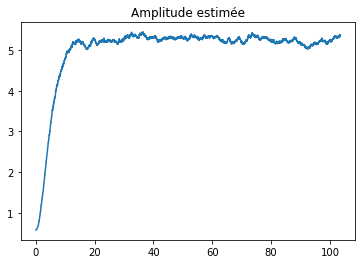

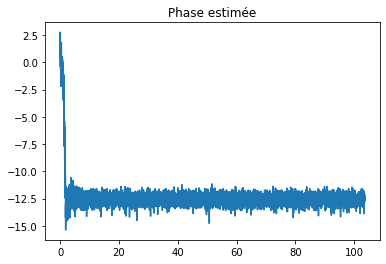

In [7]:
plot_coeffs_EKF()

On observe bien une amplitude qui tend vers 5, ainsi qu'une phase qui tend vers 0 [2$\pi$], ce qui montre que notre algorithme semble fonctionner.

Q[0,0] = 2e-05
Q[1,1] = 0.2


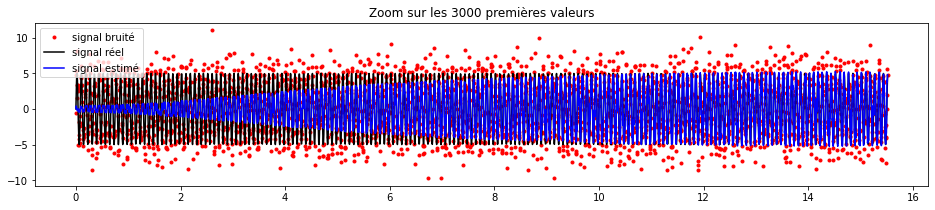

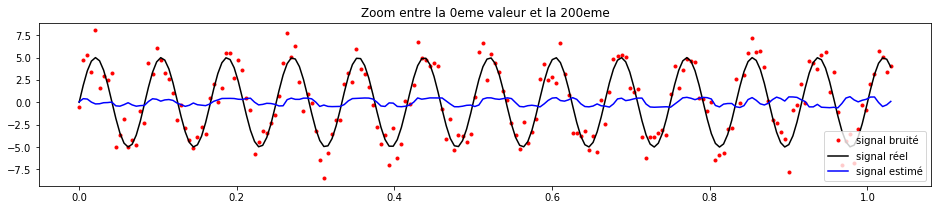

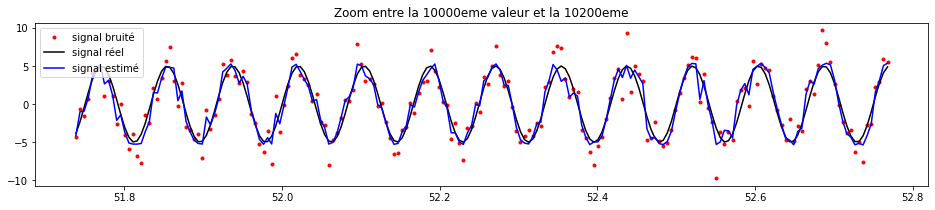

Q[0,0] = 2e-05
Q[1,1] = 0.2


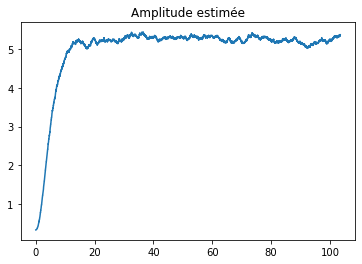

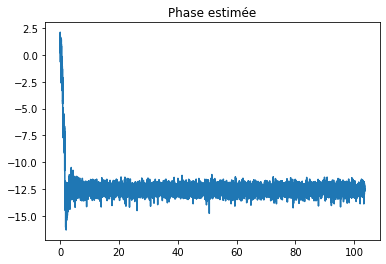

In [8]:
diag = [2e-5,2e-1]
plot_EKF(diag)
plot_coeffs_EKF(diag)

Pour la valeur de Q initialement donnée, on observe un temps de transition durant laquelle le signal estimé va augmenter en amplitude jusqu'à atteindre celle du signal réel. Au début, le signal estimé a une amplitude faible, ensuite, quand la transition est passée, le signal estimé colle bien au signal réel.


Voyons maintenant ce qui se passe si on change les valeurs de la diagonale de Q, la première valeur de Q va jouer sur l'amplitude du signal du signal estimé, la deuxième va jouer sur la phase.

### Que se passe-t-il pour si on change la première valeur de Q?

#### Pour une valeur très faible :

Q[0,0] = 2e-10
Q[1,1] = 0.2


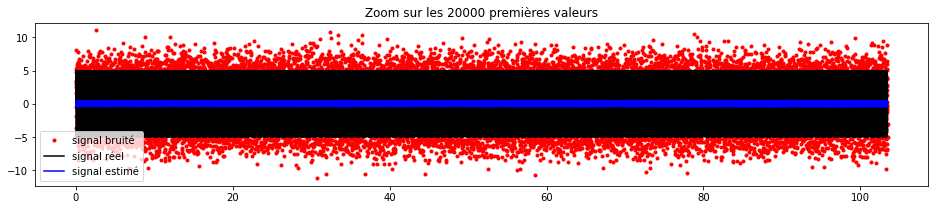

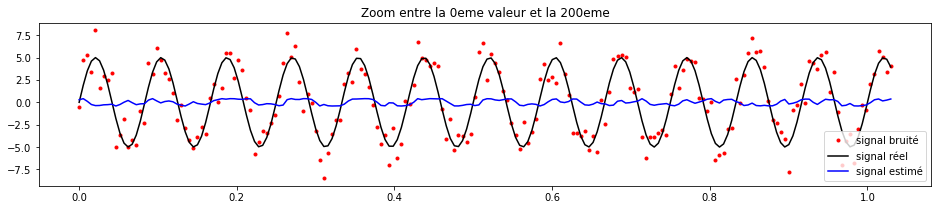

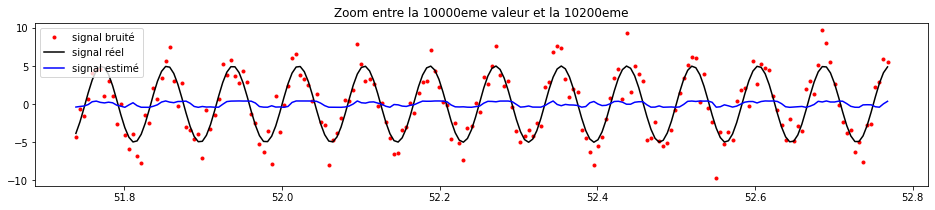

Q[0,0] = 2e-10
Q[1,1] = 0.2


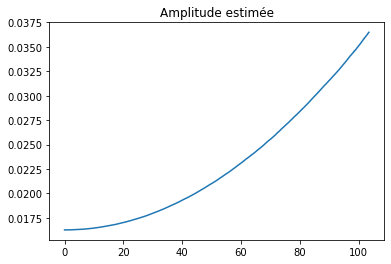

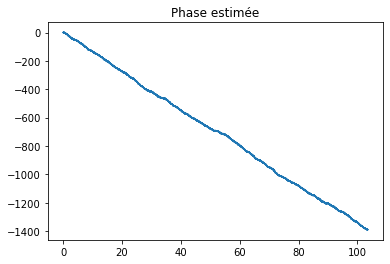

In [10]:
diag = [2e-10,2e-1]
plot_EKF(diag,nb_first_values = 20000)
plot_coeffs_EKF(diag)

Avec une valeur trop faible, le signal ne va jamais tendre vers le signal réel, le temps de transition semble tendre vers +$\infty$.

#### Pour une valeur grande :

Q[0,0] = 10.0
Q[1,1] = 0.2


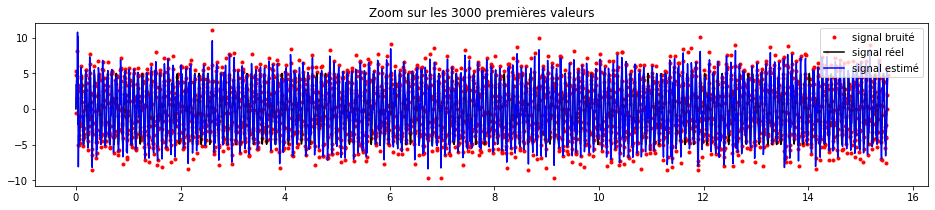

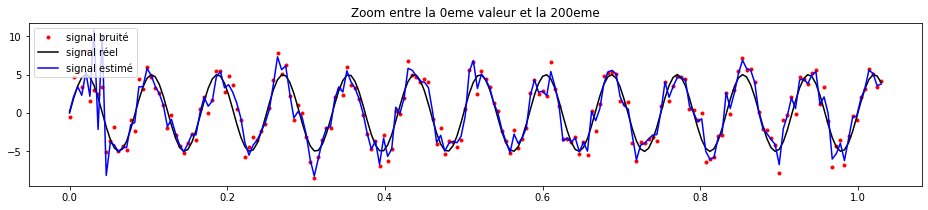

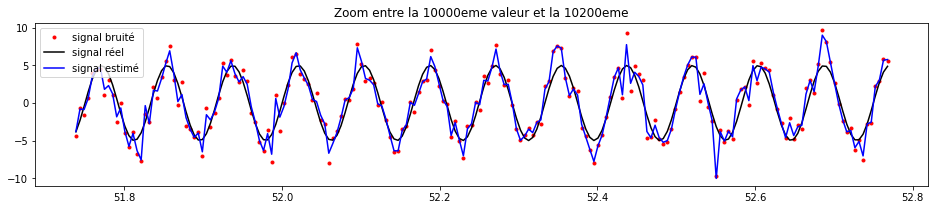

Q[0,0] = 10.0
Q[1,1] = 0.2


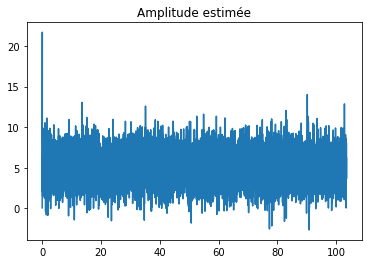

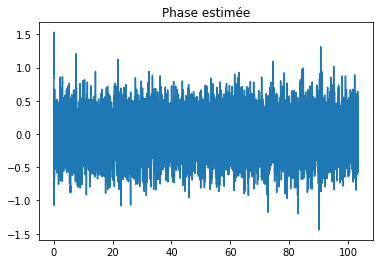

In [11]:
diag = [10,2e-1]
plot_EKF(diag)
plot_coeffs_EKF(diag)

On voit ici qu'il n'y a plus de temps de transition, l'amplitude du signal estimé est tout de suite cohérent avec celle du signal réel. En revanche, on voit que l'amplitude prend des valeurs qui dépassent souvent celui du sinus de base. Globalement, le signal est moins propre qu'avec la première valeure de Q, il est plus bruité.

On voit également que l'estimation de la phase et de l'amplitude sont très bruités.

Il y a un compromis à faire entre qualité du signal et temps de transition.

### Que se passe-t-il pour si on change la deuxième valeur de Q?

#### Pour une valeur très faible :

Q[0,0] = 2e-05
Q[1,1] = 2e-15


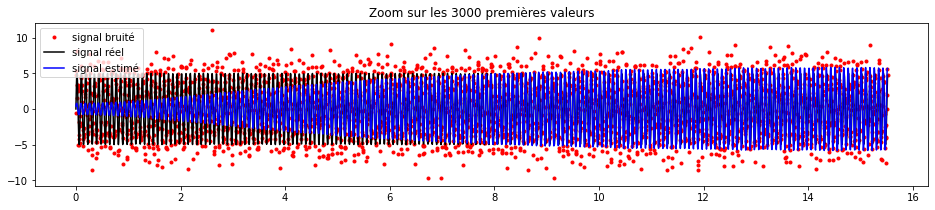

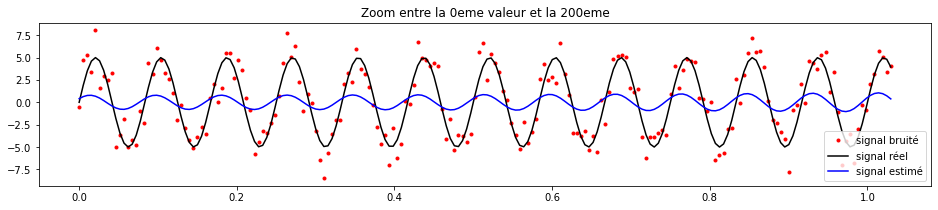

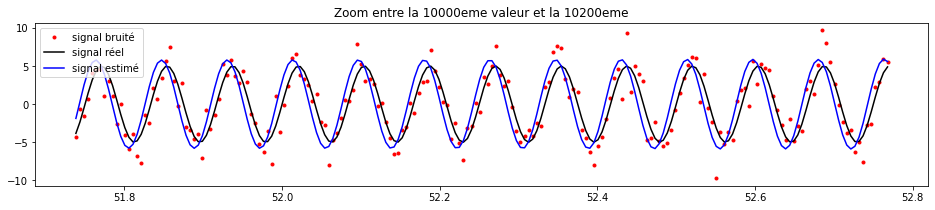

Q[0,0] = 2e-05
Q[1,1] = 2e-15


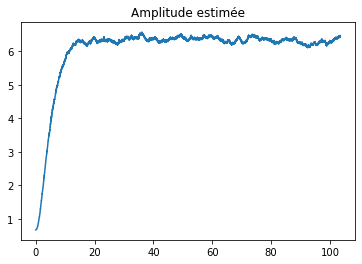

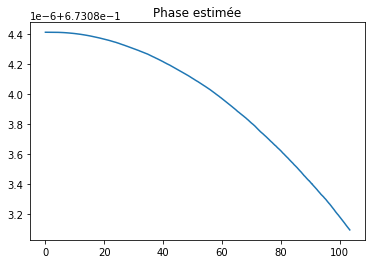

In [12]:
diag = [2e-5,2e-15]
plot_EKF(diag,nb_first_values = 3000)
plot_coeffs_EKF(diag)

On retrouve les mêmes conclusions que pour la première valeur : la phase semble tendre trop lentement vers la valeur souhaitée.
On observe donc un déphasage assez important entre le signal réel et estimé.

#### Pour une valeur très élevé :

Q[0,0] = 2e-05
Q[1,1] = 1.0


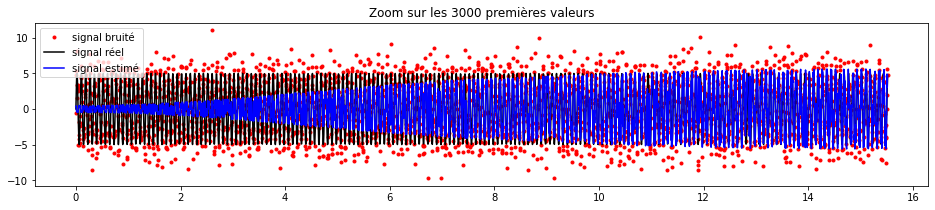

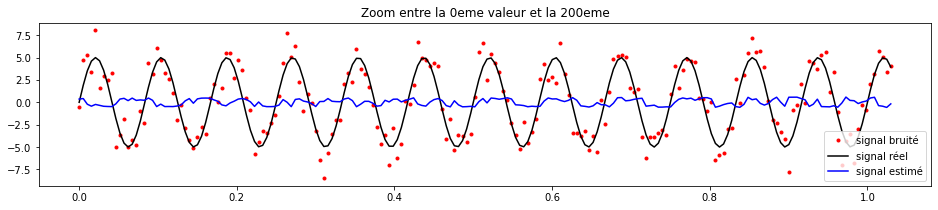

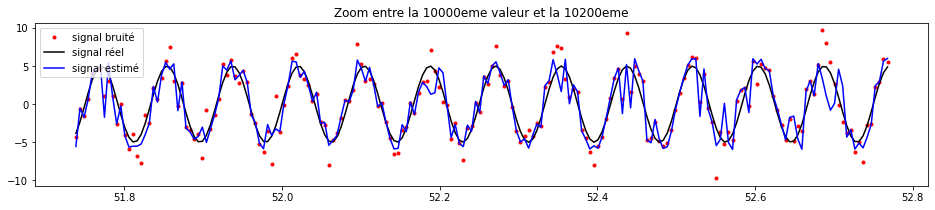

Q[0,0] = 2e-05
Q[1,1] = 1.0


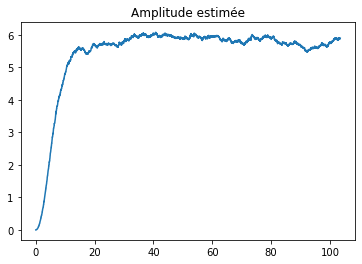

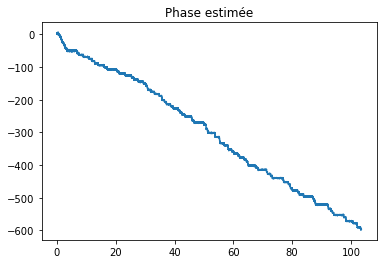

In [13]:
diag = [2e-5,1]
plot_EKF(diag,nb_first_values = 3000)
plot_coeffs_EKF(diag)

Pour une valeur élevée, il semble que la phase ne tend pas vers la phase réelle (0 [2$\pi$])

On retrouve un signal estimé très bruité.